<a href="https://colab.research.google.com/github/giulicrenna/data_science/blob/main/Python_for_data_science_clustering_linkedin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import preprocessing
from sklearn import datasets
import pandas as pd
import numpy as np
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
HRD_ = pd.read_csv('/content/drive/MyDrive/Instituto Crenna/csv/HRDataset_v14.csv')
print(HRD_.columns.values)
HRD_

['Employee_Name' 'EmpID' 'MarriedID' 'MaritalStatusID' 'GenderID'
 'EmpStatusID' 'DeptID' 'PerfScoreID' 'FromDiversityJobFairID' 'Salary'
 'Termd' 'PositionID' 'Position' 'State' 'Zip' 'DOB' 'Sex' 'MaritalDesc'
 'CitizenDesc' 'HispanicLatino' 'RaceDesc' 'DateofHire'
 'DateofTermination' 'TermReason' 'EmploymentStatus' 'Department'
 'ManagerName' 'ManagerID' 'RecruitmentSource' 'PerformanceScore'
 'EngagementSurvey' 'EmpSatisfaction' 'SpecialProjectsCount'
 'LastPerformanceReview_Date' 'DaysLateLast30' 'Absences']


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


# Clustering

In [ ]:
HRD = HRD_[['MarriedID', 'GenderID', 'Salary', 'Absences', 'EngagementSurvey']].dropna()
HRD_scaled = preprocessing.scale(HRD)
HRD_scaled

array([[-0.81431051,  1.14179845, -0.25938221, -1.58097881,  0.6213019 ],
       [ 1.22803278,  1.14179845,  1.41010073,  1.15725668,  1.07776861],
       [ 1.22803278, -0.87581131, -0.16187526, -1.23869937, -1.38207974],
       ...,
       [-0.81431051, -0.87581131,  6.02915881,  0.98611696,  0.6213019 ],
       [-0.81431051, -0.87581131,  0.8071025 ,  0.13041837,  1.12848713],
       [-0.81431051, -0.87581131, -0.95455218, -1.40983909,  0.4945056 ]])

In [ ]:
HRD_scaled.mean(axis=0)

array([ 1.14235167e-17,  5.71175833e-17, -5.71175833e-18, -1.25658683e-16,
       -4.08390720e-16])

<AxesSubplot:xlabel='Salary', ylabel='EngagementSurvey'>

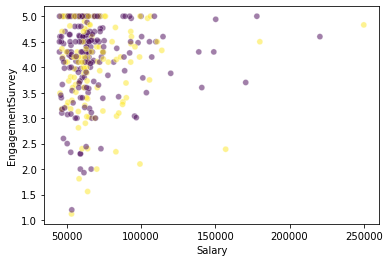

In [ ]:
sns.scatterplot(x=HRD_['Salary'],
                y = HRD_['EngagementSurvey'],
                c = HRD_['MarriedID'],
                alpha = .5)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
'''
n_jobs = -1 to use all CPU cores
'''
New_HRD = HRD_[['Salary', 'EngagementSurvey']]
kmeans = KMeans(n_clusters=3,  
                random_state=0).fit(New_HRD)
kmeans.labels_ # Nos indica a que cluster pertenece cada observación

array([2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2,

In [ ]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([ 50,  10, 251]))

<AxesSubplot:xlabel='Salary', ylabel='EngagementSurvey'>

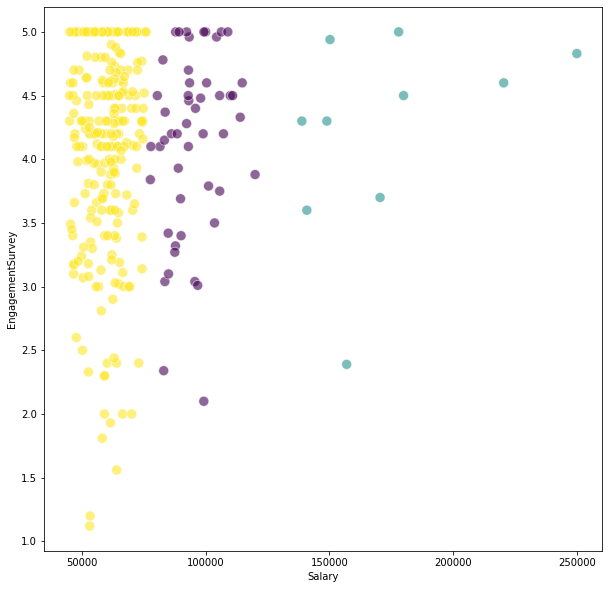

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=HRD_['Salary'],
                y = HRD_['EngagementSurvey'],
                c = kmeans.labels_,
                s = 100,
                alpha = .6)

# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
New_HRD = HRD_[['Salary', 'EngagementSurvey', 'Absences']]
clstr = AgglomerativeClustering(2)
clstr.fit(New_HRD)

AgglomerativeClustering()

<AxesSubplot:xlabel='Salary', ylabel='EngagementSurvey'>

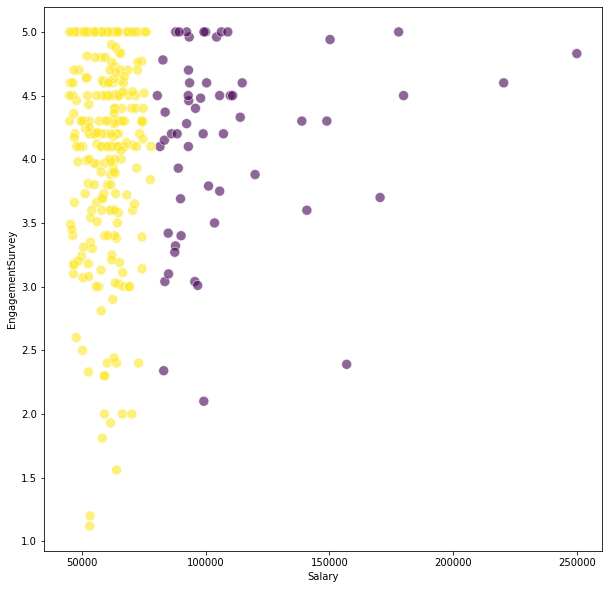

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x=New_HRD['Salary'],
                y = New_HRD['EngagementSurvey'],
                c = clstr.fit_predict(New_HRD),
                s = 100,
                alpha = .6)